In [6]:
import random
import torch
from d2l import d2l
from matplotlib import pyplot as plt

In [2]:
def synthetic_data(w, b, num_examples):
    """Generate y = Xw + b + noise."""
    X = torch.normal(0, 1, (num_examples, len(w)))
    y = torch.matmul(X, w) + b
    y  += torch.normal(0, 0.01, y.shape)
    return X, y.reshape((-1, 1))

true_w = torch.tensor([2, -3.4])
true_b = 4.2
features, labels=  synthetic_data(true_w, true_b, 1000)

In [3]:
print('features:', features[0], '\nlabel:', labels[0])

features: tensor([0.1189, 0.0979]) 
label: tensor([4.1057])


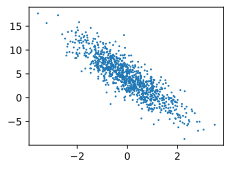

In [9]:
d2l.set_figsize()
plt.scatter(features[:, (1)].detach().numpy(), labels.detach().numpy(), 1);

In [10]:
def data_iter(batch_size, features, labels):
    num_examples = len(features)
    indices = list(range(num_examples))
    random.shuffle(indices)
    for i in range(0, num_examples, batch_size):
        batch_indices = torch.tensor(indices[i:min(i + batch_size, num_examples)])
        yield features[batch_indices], labels[batch_indices]

In [11]:
batch_size = 10
for X, y in data_iter(batch_size, features, labels):
    print(X, '\n', y)
    break

tensor([[-0.3259, -0.4308],
        [-0.9341, -0.4495],
        [-0.9548,  1.6117],
        [ 0.6163, -1.0877],
        [ 0.8432,  0.7456],
        [-1.1969, -1.1698],
        [-0.8414,  0.6981],
        [-1.0109,  0.6960],
        [ 0.5428, -1.9586],
        [ 1.5730, -0.6966]]) 
 tensor([[ 5.0119],
        [ 3.8578],
        [-3.2007],
        [ 9.1142],
        [ 3.3451],
        [ 5.7719],
        [ 0.1437],
        [-0.1773],
        [11.9405],
        [ 9.7126]])


In [12]:
w = torch.normal(0, 0.01, size=(2, 1), requires_grad=True)
b = torch.zeros(1, requires_grad=True)

In [13]:
def linreg(X, w, b):
    """The linear regression model."""
    return torch.matmul(X, w) + b

In [14]:
def squared_loss(y_hat, y):
    """Squared loss."""
    return (y_hat - y.reshape(y_hat.shape)) ** 2 / 2

In [15]:
def sgd(params, lr, batch_size):
    """Minibatch stochastic gradient descent."""
    with torch.no_grad():
        for param in params:
            param -= lr * param.grad / batch_size
            param.grad.zero_()

In [16]:
lr = 0.03
num_epoches = 3
net = linreg
loss = squared_loss

for epoch in range(num_epoches):
    for X, y in data_iter(batch_size, features, labels):
        l = loss(net(X, w, b), y)
        l.sum().backward()
        sgd([w, b], lr, batch_size)
    with torch.no_grad():
        train_l = loss(net(features, w, b), labels)
        print(f'epoch {epoch + 1}, loss {float(train_l.mean()):f}')

epoch 1, loss 0.026940
epoch 2, loss 0.000096
epoch 3, loss 0.000048


In [17]:
print(f'w error: {true_w - w.reshape(true_w.shape)}')
print(f'b error: {true_b - b}')

w error: tensor([-0.0010,  0.0005], grad_fn=<SubBackward0>)
b error: tensor([0.0008], grad_fn=<RsubBackward1>)
